In [69]:
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
import matplotlib.pyplot as plt

In [70]:
tf = pd.read_csv('/users/walml/Downloads/wandb_tf_vit.csv')

In [71]:
tf.columns.values

array(['Step', 'vit_2xgpu_lowadam - tensorboard/validation/epoch_loss',
       'vit_2xgpu_lowadam - tensorboard/validation/epoch_loss__MIN',
       'vit_2xgpu_lowadam - tensorboard/validation/epoch_loss__MAX',
       'vit_tiniest:2xgpu - tensorboard/validation/epoch_loss',
       'vit_tiniest:2xgpu - tensorboard/validation/epoch_loss__MIN',
       'vit_tiniest:2xgpu - tensorboard/validation/epoch_loss__MAX'],
      dtype=object)

In [72]:
b = pd.read_csv('/Users/walml/Downloads/wandb_baseline_tf.csv')

In [73]:
b.columns.values

array(['Step', 'dr5_tf_co - tensorboard/validation/epoch_loss',
       'dr5_tf_co - tensorboard/validation/epoch_loss__MIN',
       'dr5_tf_co - tensorboard/validation/epoch_loss__MAX'], dtype=object)

In [78]:
ts_factor = 0.5

tf['smoothed'] = tf['vit_tiniest:2xgpu - tensorboard/validation/epoch_loss'].ewm(alpha=(1 - ts_factor)).mean()
tf['smoothed']

0           NaN
1     10.163021
2      9.857178
3      9.059166
4      9.059166
        ...    
57     7.160766
58     7.142076
59     7.128774
60     7.127312
61     7.178811
Name: smoothed, Length: 62, dtype: float64

In [79]:
b['smoothed'] = b['dr5_tf_co - tensorboard/validation/epoch_loss'].ewm(alpha=(1 - ts_factor)).mean()
b['smoothed']

0     10.901669
1      9.597336
2      8.651620
3      8.435550
4      8.320275
        ...    
69     7.138160
70     7.128742
71     7.107162
72     7.090074
73     7.090211
Name: smoothed, Length: 74, dtype: float64

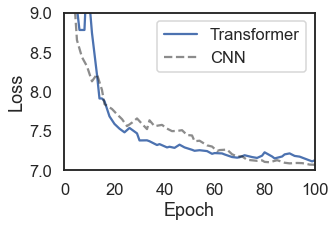

In [98]:

# sns.set(font_scale=2., style='white')
plt.figure(figsize=(5, 3.5))
sns.set_context('talk')
# plt.plot(tf['Step'], ['vit_tiniest:2xgpu - tensorboard/validation/epoch_loss'], label='Transformer')
plt.plot(tf['Step'], tf['smoothed'], label='Transformer')
# validation/epoch_loss'], 
plt.plot(b['Step'], b['smoothed'], label='CNN', color='k', linestyle='--', alpha=.5)
# plt.axhline(7.098)
plt.ylim([7, 9])
plt.xlim([0, 100])
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('Loss')
# /plt.plot(tf['Step'], tf['vit_2xgpu_lowadam - tensorboard/
plt.tight_layout()
plt.savefig('comparison.pdf')
plt.savefig('comparison.png')

In [ ]:
py = pd.read_csv('/users/walml/Downloads/wandb_pyt_vit.csv')
py.columns.values

In [ ]:
plt.plot(py['epoch'], py['maxvit:tiny_224_maxvit_tiny_1xgpu - val/supervised_loss_epoch'])
plt.plot(py['epoch'], py['maxvit:tiniest_224_maxvit - val/supervised_loss_epoch'])
plt.axhline(1.2)